### Baseball EDA Visualizations

In [17]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
advanced = pd.read_csv("/Users/anishravilla/Desktop/Data Science Union/Advanced_Pitch_Data.csv", float_precision = 'round_trip')
advanced.info()

advanced



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            660 non-null    int64  
 1   Tm              660 non-null    object 
 2   BA              660 non-null    float64
 3   OBP             660 non-null    float64
 4   SLG             660 non-null    float64
 5   OPS             660 non-null    float64
 6   BAbip           660 non-null    float64
 7   HR%             660 non-null    object 
 8   SO%             660 non-null    object 
 9   BB%             660 non-null    object 
 10  LD%             660 non-null    object 
 11  GB%             660 non-null    object 
 12  FB%             660 non-null    object 
 13  GB/FB           660 non-null    float64
 14  WPA             660 non-null    float64
 15  cWPA            660 non-null    object 
 16  RE24            660 non-null    float64
 17  playoff_status  660 non-null    int

,Year,Tm,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24,playoff_status
0,2021,Arizona Diamondbacks,0.267,0.339,0.468,0.807,0.303,3.7%,19.7%,8.9%,24.2%,39.8%,27.4%,0.68,-18.6,-2.1%,-163.6,0
1,2021,Atlanta Braves,0.234,0.308,0.392,0.700,0.283,3.1%,23.8%,8.7%,24.1%,43.3%,24.5%,0.79,8.4,6.3%,96.6,1
2,2021,Baltimore Orioles,0.273,0.344,0.473,0.817,0.306,4.1%,19.7%,9.0%,24.5%,39.8%,27.0%,0.67,-16.4,-0.1%,-211.6,0
3,2021,Boston Red Sox,0.258,0.332,0.417,0.749,0.324,2.9%,24.8%,8.9%,23.4%,44.2%,24.3%,0.80,5.3,4.3%,33.4,1
4,2021,Chicago Cubs,0.255,0.338,0.442,0.780,0.297,3.8%,21.9%,9.6%,24.0%,44.5%,24.2%,0.83,-5.8,2.7%,-106.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2000,Seattle Mariners,0.262,0.339,0.416,0.755,0.290,2.7%,15.9%,10.1%,25.2%,38.2%,29.3%,0.64,9.0,11.5%,48.2,1
656,2000,St. Louis Cardinals,0.259,0.338,0.434,0.771,0.290,3.2%,17.7%,9.8%,26.2%,37.8%,28.5%,0.63,6.5,3.4%,38.1,1
657,2000,Tampa Bay Devil Rays,0.278,0.345,0.451,0.796,0.302,3.2%,15.2%,8.5%,25.9%,41.6%,26.9%,0.73,-1.3,-2.5%,-2.8,0
658,2000,Texas Rangers,0.294,0.369,0.475,0.845,0.317,3.1%,14.0%,10.1%,28.5%,36.3%,28.7%,0.58,-9.3,-2.9%,-121.1,0


In [3]:
#Need to clean out cells with percentages and turn into integer/float data
advanced['HR%'] = advanced['HR%'].str.extract('(\d+.\d+)%').astype('float')
advanced['SO%'] = advanced['SO%'].str.extract('(\d+.\d+)%').astype('float')
advanced['BB%'] = advanced['BB%'].str.extract('(\d+.\d+)%').astype('float')
advanced['LD%'] = advanced['LD%'].str.extract('(\d+.\d+)%').astype('float')
advanced['GB%'] = advanced['GB%'].str.extract('(\d+.\d+)%').astype('float')
advanced['FB%'] = advanced['FB%'].str.extract('(\d+.\d+)%').astype('float')
advanced['cWPA'] = advanced['cWPA'].str.extract('(\d+.\d+)%').astype('float')


In [4]:
advanced.head()

,Year,Tm,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24,playoff_status
0,2021,Arizona Diamondbacks,0.267,0.339,0.468,0.807,0.303,3.7,19.7,8.9,24.2,39.8,27.4,0.68,-18.6,2.1,-163.6,0
1,2021,Atlanta Braves,0.234,0.308,0.392,0.700,0.283,3.1,23.8,8.7,24.1,43.3,24.5,0.79,8.4,6.3,96.6,1
2,2021,Baltimore Orioles,0.273,0.344,0.473,0.817,0.306,4.1,19.7,9.0,24.5,39.8,27.0,0.67,-16.4,0.1,-211.6,0
3,2021,Boston Red Sox,0.258,0.332,0.417,0.749,0.324,2.9,24.8,8.9,23.4,44.2,24.3,0.80,5.3,4.3,33.4,1
4,2021,Chicago Cubs,0.255,0.338,0.442,0.780,0.297,3.8,21.9,9.6,24.0,44.5,24.2,0.83,-5.8,2.7,-106.7,0


### Visualization 1: Line Plot

[Text(0.5, 1.0, 'Strike Out Percentage 2000-2020')]

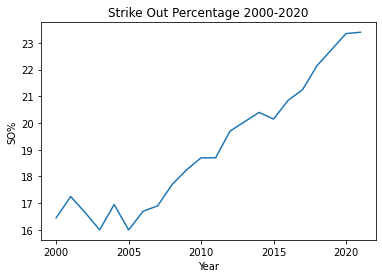

In [5]:
#Average Strike out percentage grouped by Year
strike = advanced.groupby('Year')['SO%'].median()
sns.lineplot(data = strike).set(title = "Strike Out Percentage 2000-2020")
#Average Strike Out Percentage increased over the years



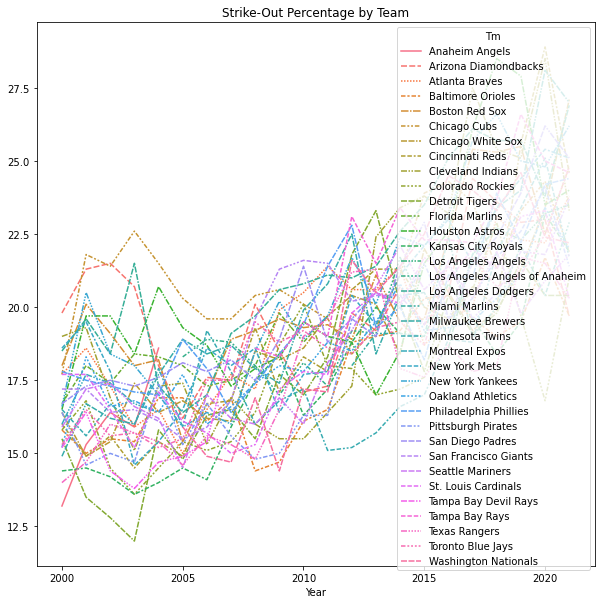

In [7]:
strike_wide = advanced.pivot("Year", "Tm", "SO%")

fig = plt.figure(figsize = (10,10))

fig = sns.lineplot(data = strike_wide).set(title = "Strike-Out Percentage by Team")

### Visualization 2: Barplot

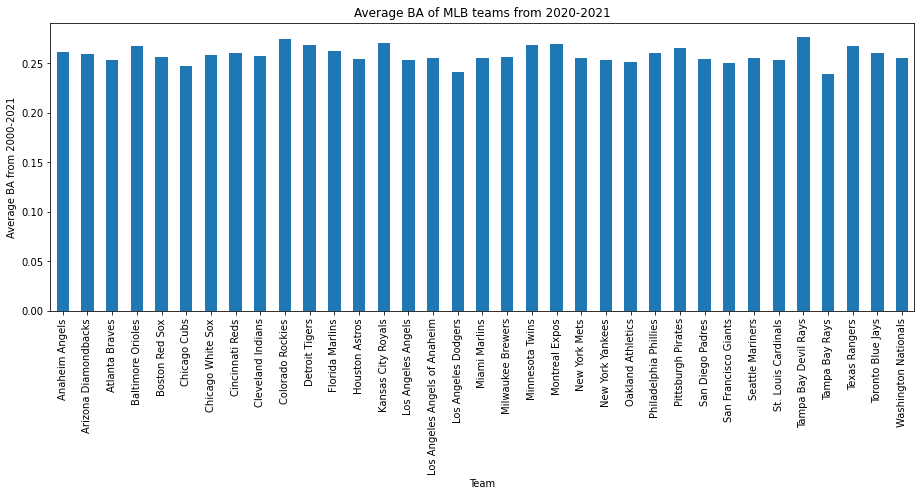

In [15]:
#Barplot comparing BA for each time over their duration
ba = advanced.groupby('Tm')['BA'].mean()
ba

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
fig = ba.plot.bar(x = "Team")
fig = plt.xlabel("Team")
fig = plt.ylabel("Average BA from 2000-2021")
fig = plt.title("Average BA of MLB teams from 2020-2021")



### Visualization 3: Histogram

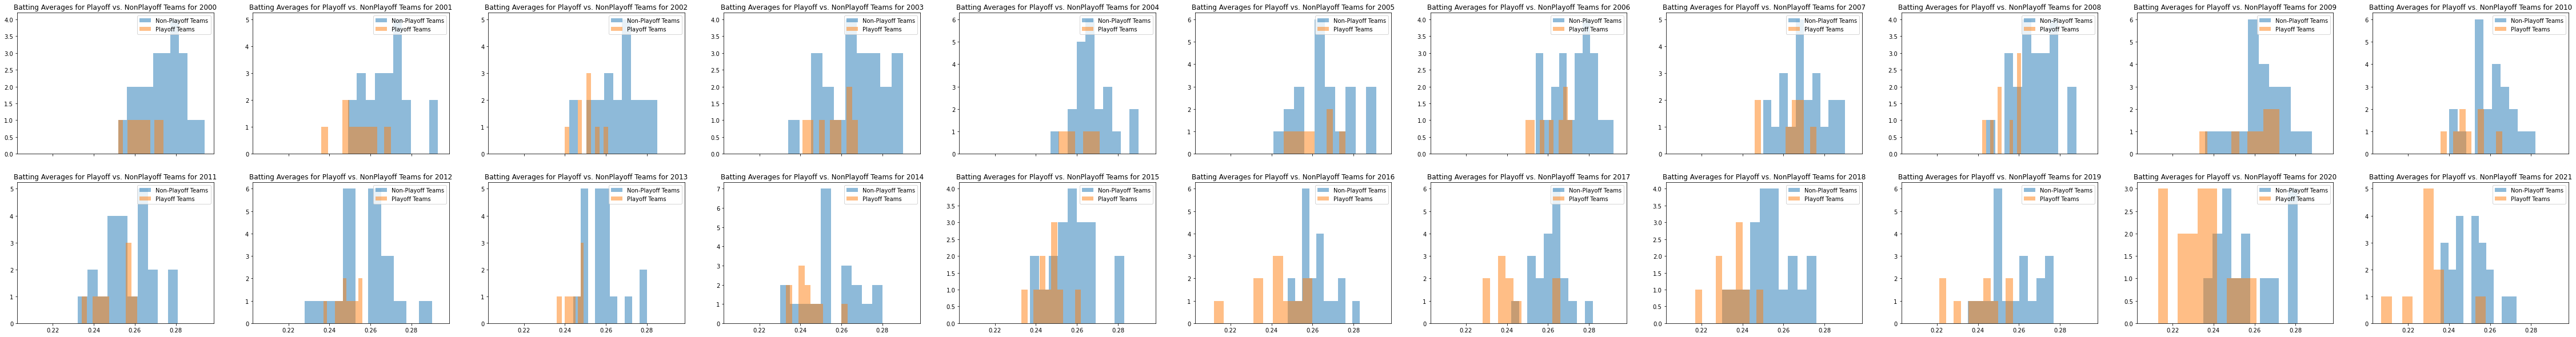

In [137]:
fig, ax = plt.subplots(nrows = 2, ncols = 11, sharex = True, figsize = (80,10))
#Store years in a matrix that matches subplot arrangement
matrix = np.arange(2000,2022).reshape(2,11)

def plot_hist1(advanced, year, fig, ax, i, j):
    df = advanced.groupby('Year').get_group(year)
    df_0 = df.loc[df['playoff_status'] == 0, ]
    df_1 = df.loc[df['playoff_status'] == 1,]
    
    ax[i,j].hist(df_0['BA'], alpha = 0.5, label = ["Non-Playoff Teams"])
    ax[i,j].hist(df_1['BA'], alpha = 0.5, label = ["Playoff Teams"])
    ax[i,j].legend(loc='upper right')
    ax[i,j].set_title("Batting Averages for Playoff vs. NonPlayoff Teams for " + str(year))


for i in range(2):
    for j in range(11):
        plot_hist1(advanced, matrix[i][j], fig, ax, i, j)




Text(0.5, 1.0, 'Distribution of Batting Averages for Playoff vs Non-Playoff Teams')

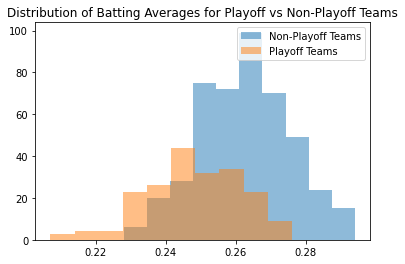

In [144]:
#across all years
fig1, plot = plt.subplots(1)
plot.hist((advanced[advanced['playoff_status'] == 0])['BA'], alpha = 0.5, label = ["Non-Playoff Teams"])
plot.hist((advanced[advanced['playoff_status'] == 1])['BA'], alpha = 0.5, label = ["Playoff Teams"])
plot.legend(loc='upper right')
plot.set_title("Distribution of Batting Averages for Playoff vs Non-Playoff Teams")

<AxesSubplot:>

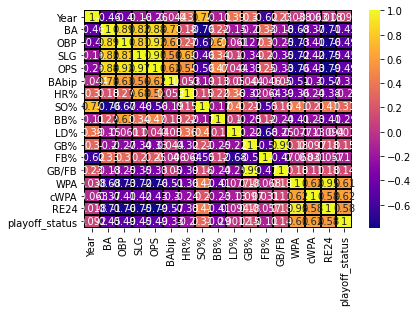

In [14]:
#Correlation Heatmap:
corr = advanced.corr()
sns.heatmap(corr, annot = True, cmap ='plasma',
            linecolor ='black', linewidths = 0.05)